In [1]:
import os
os.chdir(r"C:\Users\ashto\DAPPEr-main") #change directory to dapper-main folder
current_directory = os.getcwd()
print(f"Current directory: {current_directory}")

Current directory: C:\Users\ashto\DAPPEr-main


In [2]:
from src import *
from src.UDIP_Lib import *
import src.fitting.fit as R_fitting
import src.UDIP_Lib.UDIP_Lib_V19 as UDIP_Lib  #making updating UDIP_Lib easier
from src.RockSat_json.RockSat_json import import_data
import numpy as np
from scipy import signal
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import pandas as pd

In [ ]:
df = pd.read_csv(r"data\ne(in).csv")
ne_data = df['ne'][150:490]
ne_error = df['ne_err'][150:490]
time = df['time'][150:490] - 57 #account for 57 sec filter
# sweeps 150-490 where we get good data (more like 175-470)

#filtering out bad values
mask = ne_data > 1e4
ne_data_filtered = ne_data[mask]
ne_error_filtered = ne_error[mask]
time_filtered = time[mask]

Text(0, 0.5, 'Altitude (km)')

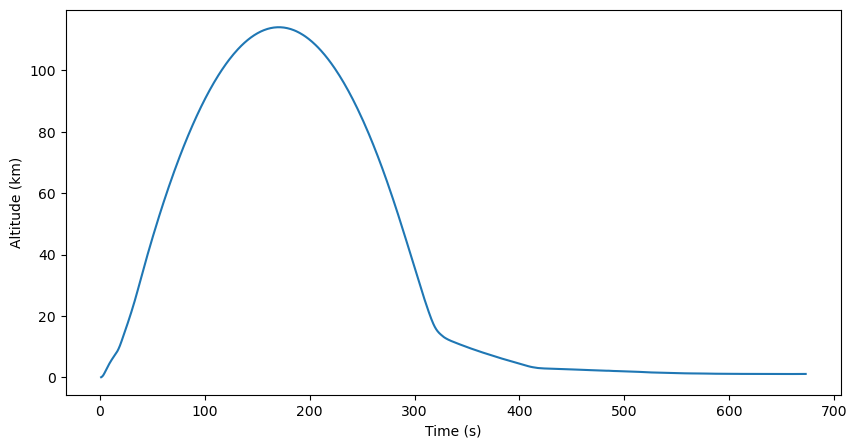

In [4]:
# extrapolate altitude data from rockon 
times_ROCK = []
altitudes_ROCK = []
with open(r"C:\Users\ashto\DAPPEr2\UDIP4\data\NRW-6381 ROCKON 41.133 R5 POSDAT 06202024.txt", "r") as rockonData5: #R5
    next(rockonData5)  # Skip the header
    for line in rockonData5:
        parts = line.strip().split()
        times_ROCK.append(float(parts[1]))  # time values
        altitudes_ROCK.append(float(parts[9]) / 1000)  # altitude values in km

plt.figure(figsize=(10, 5))
apogee = max(altitudes_ROCK)
plt.plot(times_ROCK,altitudes_ROCK)
plt.xlabel("Time (s)")
plt.ylabel("Altitude (km)")

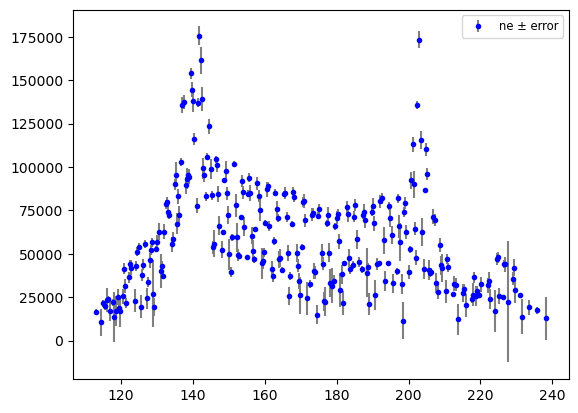

In [9]:
plt.errorbar(time_filtered, ne_data_filtered, yerr=ne_error_filtered, fmt='.',color='blue',ecolor='grey', label='ne ± error')
plt.legend(fontsize="small")

In [10]:
altitude_function = interp1d(times_ROCK, altitudes_ROCK) 
interpolated_altitudes = altitude_function(time_filtered)
#plt.scatter(ne_data,interpolated_altitudes)
apogee_value = np.where(interpolated_altitudes == apogee)[0][0] #cutting list at apogee to find temperatures going up

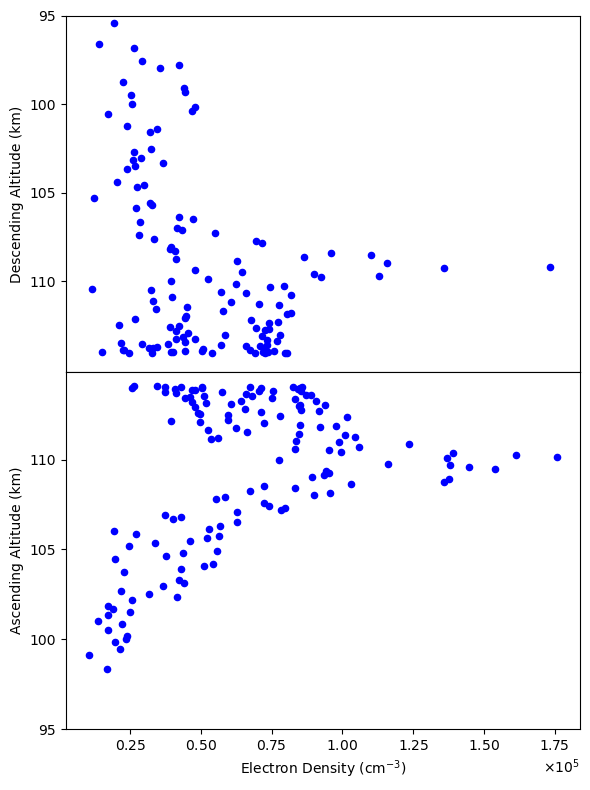

In [ ]:
#stacked plot
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(6, 8), gridspec_kw={'hspace': 0})

#First subplot (descending)
ax1.scatter(ne_data_filtered[apogee_value:], interpolated_altitudes[apogee_value:], color='blue', label='Density', s=20)
ax1.set_ylabel("Descending Altitude (km)")
ax1.invert_yaxis()  # Flip the y-axis so plot flows nicely
ax1.tick_params(labelbottom=False)  # Hide x-axis labels for the top plot (basically make the two plots into one with no space between, easier to the eye)

# Second subplot (ascending)
ax2.scatter(ne_data_filtered[:apogee_value], interpolated_altitudes[:apogee_value], color='blue', label='Density', s=20)
ax2.set_xlabel(r'Electron Density (cm$^{-3}$)')
ax2.set_ylabel("Ascending Altitude (km)")

#formatting and making the plot look nice
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2, 2))
ax2.xaxis.set_major_formatter(formatter)

ax1.set_ylim(top=95)
ax2.set_ylim(bottom=95)
yticks = np.arange(95, 115, 5)
ax1.set_yticks(yticks)
ax2.set_yticks(yticks)

plt.tight_layout()
plt.show()


In [8]:
print(min(interpolated_altitudes[:apogee_value]))
print(min(interpolated_altitudes[apogee_value:]))

96.00869999999999
91.97740000000002
